In [37]:
import numpy as np
import experimental_methods as sim
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits import mplot3d
%matplotlib notebook

In [6]:
mu = 0.5; sigma = 1
R = (100, -100)
c = (1, 1)

In [41]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Define simulation parameters:
N = 200
# epsilon = 0.5; q = 0.8


# Create time step vector:
t = np.arange(N, 0, -1)

# Simulate realization of reward-maximization strategy:
block = sim.RewardMax(N, mu, sigma, epsilon, q, R, c)
block.experiment_sim()

# Plot reward-maximizing thresholds:
fig, ax = plt.subplots()
ax.plot(t, block.thresh, color='black', label='Decision Thresholds')
ax.plot(t, -block.thresh, color='black')
ax.set_xlim((N, 1))
ax.legend()

# Plot belief realization over thresholds:
fig, ax = plt.subplots()
ax.plot(t, block.belief, linewidth=5)
ax.plot(t, block.thresh, 'k', linewidth=5)
ax.plot(t, -block.thresh, 'k', linewidth=5)
ax.set_xlim((N, 0.8))
# ax.set_xticks(np.linspace(N, 1, 4), labels=[])
# ax.set_ylim(np.max(np.abs(ax.get_ylim()))*np.array([-1, 1]))
# ax.set_yticks(np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 5), labels=[])
# print(ax.get_yticks())
# ax.spines[['top', 'right']].set_visible(False)

RT_rewarded = block.RT[block.reward == R[0]]
RT_punished = block.RT[block.reward == R[1]]
choice_rewarded = block.choice[block.reward == R[0]]
choice_punished = block.choice[block.reward == R[1]]

# Plot action timeseries representation:
fig, ax = plt.subplots()
if len(RT_rewarded) > 0:
    S = ax.stem(RT_rewarded, choice_rewarded, markerfmt='go', linefmt='green')
    S[0].set_markersize(10); S[1].set_linewidth(5)

if len(RT_punished) > 0:
    S = ax.stem(RT_punished, choice_punished, markerfmt='ro', linefmt='red')
    S[0].set_markersize(10); S[1].set_linewidth(5)
    
ax.plot(t, np.zeros_like(t), color='black')
ax.set_xlim((N, 0.8))
# ax.set_xticks(np.linspace(N, 1, 4), labels=[])
# ax.set_yticks([])
# ax.spines[['top', 'right', 'left']].set_visible(False)


NameError: name 'epsilon' is not defined

In [47]:
def run_simulation(N, epsilon, q):
    block = sim.RewardMax(N, mu, sigma, epsilon, q, R, c)
    block.experiment_sim()
    choicetime = block.RT
    time_lags = [choicetime[i-1] - choicetime[i] for i in range(1,len(choicetime))]
    dfTL = pd.DataFrame(time_lags, columns=['TL'])
    dfTL['counts'] = choicetime[0:len(choicetime)-1]
    lags = dfTL.groupby(dfTL['TL']).count()
    return np.array(time_lags), np.array(lags.index), np.array(lags.counts), dfTL.shape[0]

def compute_burstiness(lags_line):
    mean = np.mean(lags_line)
    std = np.std(lags_line)
    return (std - mean)/(std+mean)

def compute_mean(lags_line):
    return np.mean(lags_line)

def compute_std(lags_line):
    return np.std(lags_line)

def bursty_sim(L):
    q = []; eps = []; b_i = []; mu_i = []; std_i = []
    for fr in np.linspace(0.5,0.99,L):
        for haz in np.linspace(0.01,0.5,L):
            print(haz,fr)
            all_lags, lags, freq, N = run_simulation(385, haz, fr)
            q.append(fr); eps.append(haz)
            b_i.append(compute_burstiness(all_lags))
            mu_i.append(compute_mean(all_lags))
            std_i.append(compute_std(all_lags))
        
    q = np.array(q); q = q.reshape(-1,1)
    eps = np.array(eps); eps = eps.reshape(-1,1)
    b_i = np.array(b_i); b_i = b_i.reshape(-1,1)
    mu_i = np.array(mu_i); mu_i = mu_i.reshape(-1,1)
    std_i = np.array(std_i); std_i = std_i.reshape(-1,1)
    return q, eps, b_i, mu_i, std_i

def plot(q, eps, b_i):
    fig, ax = plt.subplots(figsize=(5,2.5),dpi=150)
    plt.subplots_adjust(wspace=0.4)
    plt.subplot(121)
    plt.scatter(q,b_i)
    plt.ylim([-1, 1]); plt.xlim([0.5, 1])
    plt.xlabel('$q$'); plt.ylabel('$B$')
#     q_mdl = LinearRegression(); q_mdl.fit(q,b_i)
#     plt.plot(q, q_mdl.predict(q), 'r')
    
    plt.subplot(122)
    plt.scatter(eps,b_i)
    plt.ylim([-1, 1]); plt.xlim([0, 0.5])
    plt.xlabel('$\epsilon$'); plt.yticks([])
#     eps_mdl = LinearRegression(); eps_mdl.fit(eps,b_i)
#     plt.plot(eps, eps_mdl.predict(eps), 'r')
    plt.show()

In [48]:
q, e, b, m, s = bursty_sim(20)

0.0 0.5
0.02631578947368421 0.5
0.05263157894736842 0.5
0.07894736842105263 0.5
0.10526315789473684 0.5
0.13157894736842105 0.5
0.15789473684210525 0.5
0.18421052631578946 0.5
0.21052631578947367 0.5
0.23684210526315788 0.5
0.2631578947368421 0.5
0.2894736842105263 0.5
0.3157894736842105 0.5
0.3421052631578947 0.5
0.3684210526315789 0.5
0.39473684210526316 0.5
0.42105263157894735 0.5
0.4473684210526315 0.5
0.47368421052631576 0.5
0.5 0.5
0.0 0.5263157894736842
0.02631578947368421 0.5263157894736842
0.05263157894736842 0.5263157894736842
0.07894736842105263 0.5263157894736842
0.10526315789473684 0.5263157894736842
0.13157894736842105 0.5263157894736842
0.15789473684210525 0.5263157894736842
0.18421052631578946 0.5263157894736842
0.21052631578947367 0.5263157894736842
0.23684210526315788 0.5263157894736842
0.2631578947368421 0.5263157894736842
0.2894736842105263 0.5263157894736842
0.3157894736842105 0.5263157894736842
0.3421052631578947 0.5263157894736842
0.3684210526315789 0.52631578947

0.2631578947368421 0.7894736842105263
0.2894736842105263 0.7894736842105263
0.3157894736842105 0.7894736842105263
0.3421052631578947 0.7894736842105263
0.3684210526315789 0.7894736842105263
0.39473684210526316 0.7894736842105263
0.42105263157894735 0.7894736842105263
0.4473684210526315 0.7894736842105263
0.47368421052631576 0.7894736842105263
0.5 0.7894736842105263
0.0 0.8157894736842105
0.02631578947368421 0.8157894736842105
0.05263157894736842 0.8157894736842105
0.07894736842105263 0.8157894736842105
0.10526315789473684 0.8157894736842105
0.13157894736842105 0.8157894736842105
0.15789473684210525 0.8157894736842105
0.18421052631578946 0.8157894736842105
0.21052631578947367 0.8157894736842105
0.23684210526315788 0.8157894736842105
0.2631578947368421 0.8157894736842105
0.2894736842105263 0.8157894736842105
0.3157894736842105 0.8157894736842105
0.3421052631578947 0.8157894736842105
0.3684210526315789 0.8157894736842105
0.39473684210526316 0.8157894736842105
0.42105263157894735 0.8157894

<IPython.core.display.Javascript object>


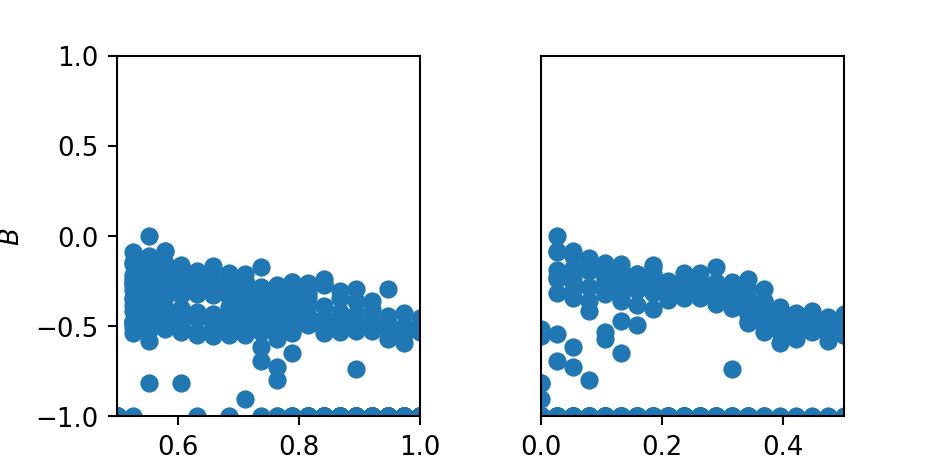

In [49]:
plot(q, e, b)

<IPython.core.display.Javascript object>


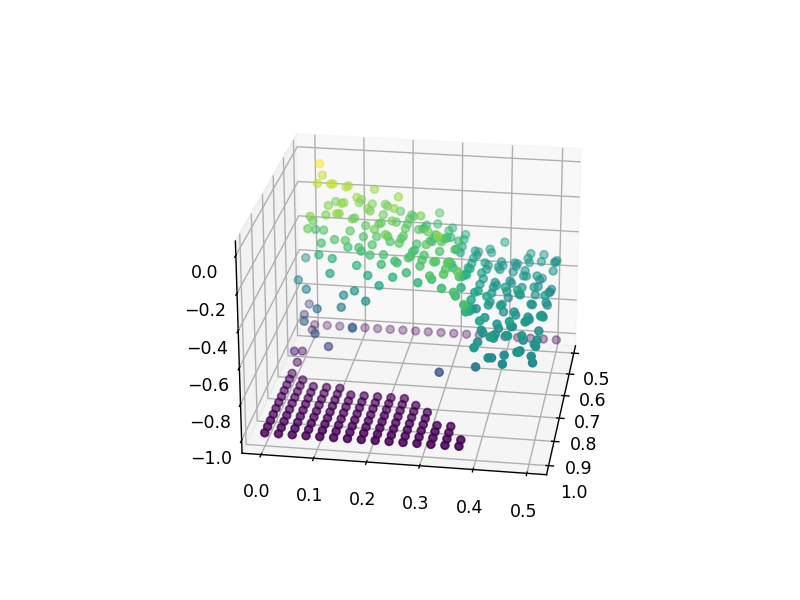

In [50]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
ax.scatter3D(q,e,b, c=b)

<IPython.core.display.Javascript object>


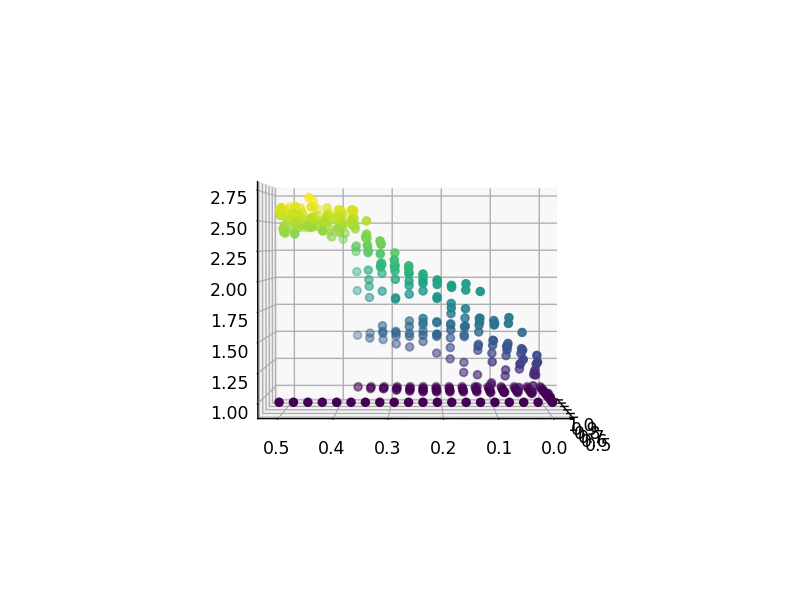

In [55]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
ax.scatter3D(q,e,m, c=m)

<IPython.core.display.Javascript object>


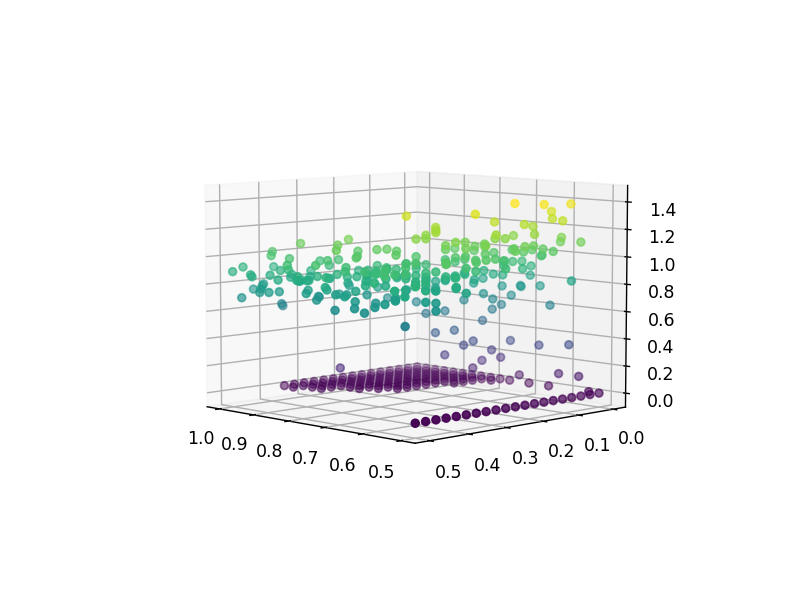

In [54]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
ax.scatter3D(q,e,s, c=s)